In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
%matplotlib inline

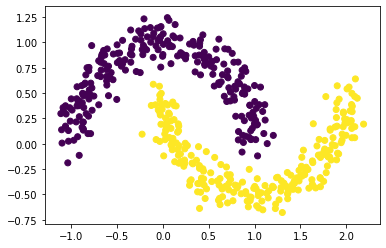

In [14]:
X, Y = make_moons(n_samples=500, noise=0.1)
df = pd.DataFrame(np.hstack([X, Y.reshape(-1,1)]), columns=['x1', 'x2',  'y'])
df.to_csv('moon_0.csv', index=False)
plt.scatter(X[:,0], X[:,1], c=Y)


In [22]:
for i in range(10):
    deg = (i+1)*math.pi/10
    X, Y = make_moons(n_samples=500, noise=0.1)
    rot = np.array([[math.cos(deg), math.sin(deg)], [-math.sin(deg), math.cos(deg)]])
    X = np.matmul(X, rot)
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.savefig('moon%d.png' % (i+1))
    plt.clf()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, stratify=Y)
    df = pd.DataFrame(np.hstack([X_train, Y_train.reshape(-1,1)]), columns=['x1', 'x2', 'y'])
    df.to_csv('moon_%d.csv' % (i+1))
    df = pd.DataFrame(np.hstack([X_test, Y_test.reshape(-1,1)]), columns=['x1', 'x2', 'y'])
    df.to_csv('moon_test_%d.csv' % (i+1))

<Figure size 432x288 with 0 Axes>

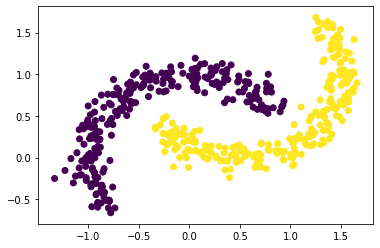

In [8]:
import ot
from ot.bregman import *
from ot.da import *

deg = math.pi/5
X, Y = make_moons(n_samples=500, noise=0.1)
X1, Y1 = make_moons(n_samples=500, noise=0.1)
rot = np.array([[math.cos(deg), math.sin(deg)], [-math.sin(deg), math.cos(deg)]])
X1 = np.matmul(X1, rot)
plt.scatter(X1[:,0], X1[:,1], c=Y1)




(-1.5, 2)

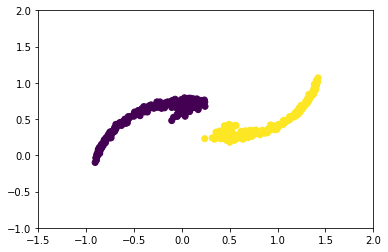

In [19]:
plt.clf()
tr = ot.da.SinkhornTransport(max_iter=100)
tr.fit(Xs=X, ys=Y, Xt=X1, yt=Y1)
XX = tr.transform(X)

plt.scatter(XX[:,0], XX[:,1], c=Y)
plt.ylim(-1, 2)
plt.xlim(-1.5, 2)